## Importação, Análises Gerais e Transformação dos Dados

### Bibliotecas

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importando dataset

In [57]:
df = pd.read_csv("../data/Insurance_claims_event_log_V1.csv", sep=',', decimal=',') 

### Análises gerais
Head, Tail, datatypes, data columns, entries, count nulls, uniques

In [58]:
df.head()

,case_id,activity_name,timestamp,claimant_name,agent_name,adjuster_name,claim_amount,claimant_age,type_of_policy,car_make,car_model,car_year,type_of_accident,user_type
0,a626bc58-a7b2-4eff-aca9-2a622cd0c492,First Notification of Loss (FNOL),2020-09-24 14:08:42.423530,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
1,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Assign Claim,2020-10-13 03:51:28.627923,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
2,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Claim Decision,2020-10-14 22:30:14.948970,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
3,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Set Reserve,2020-10-24 11:49:39.053890,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
4,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Payment Sent,2020-10-27 05:46:04.378718,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA


In [59]:
df.tail()

,case_id,activity_name,timestamp,claimant_name,agent_name,adjuster_name,claim_amount,claimant_age,type_of_policy,car_make,car_model,car_year,type_of_accident,user_type
179995,45719dbf-c504-4ee5-a8bc-ba357aaf54b5,Assign Claim,2021-10-14 12:53:43.253211,Valerie Williams,Melissa Benson,Kristin Gonzalez,8234.96,40,Comprehensive,Hyundai,Elantra,2019,Head-on,Human
179996,45719dbf-c504-4ee5-a8bc-ba357aaf54b5,Claim Decision,2021-10-22 10:40:02.327804,Valerie Williams,Melissa Benson,Kristin Gonzalez,8234.96,40,Comprehensive,Hyundai,Elantra,2019,Head-on,Human
179997,45719dbf-c504-4ee5-a8bc-ba357aaf54b5,Set Reserve,2021-10-25 14:29:19.051135,Valerie Williams,Melissa Benson,Kristin Gonzalez,8234.96,40,Comprehensive,Hyundai,Elantra,2019,Head-on,Human
179998,45719dbf-c504-4ee5-a8bc-ba357aaf54b5,Payment Sent,2021-11-01 19:46:22.587529,Valerie Williams,Melissa Benson,Kristin Gonzalez,8234.96,40,Comprehensive,Hyundai,Elantra,2019,Head-on,Human
179999,45719dbf-c504-4ee5-a8bc-ba357aaf54b5,Close Claim,2021-11-06 10:15:11.732385,Valerie Williams,Melissa Benson,Kristin Gonzalez,8234.96,40,Comprehensive,Hyundai,Elantra,2019,Head-on,Human


In [60]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   case_id           180000 non-null  object
 1   activity_name     180000 non-null  object
 2   timestamp         180000 non-null  object
 3   claimant_name     180000 non-null  object
 4   agent_name        180000 non-null  object
 5   adjuster_name     180000 non-null  object
 6   claim_amount      180000 non-null  object
 7   claimant_age      180000 non-null  int64 
 8   type_of_policy    180000 non-null  object
 9   car_make          180000 non-null  object
 10  car_model         180000 non-null  object
 11  car_year          180000 non-null  int64 
 12  type_of_accident  180000 non-null  object
 13  user_type         180000 non-null  object
dtypes: int64(2), object(12)
memory usage: 19.2+ MB


None

In [61]:
df['claim_amount'] = df['claim_amount'].astype(float)

df.describe()

,claim_amount,claimant_age,car_year
count,180000.000000,180000.000000,180000.000000
mean,5498.598991,51.510233,2016.034367
std,2601.273015,19.691143,3.745014
min,1000.280000,18.000000,2010.000000
25%,3242.482500,34.000000,2013.000000
50%,5498.965000,52.000000,2016.000000
75%,7758.817500,69.000000,2019.000000
max,9999.470000,85.000000,2022.000000


In [62]:
#Contagem de valores únicos para verificar variações de frequência

display(df['activity_name'].value_counts())
display(df['car_model'].value_counts())
display(df['adjuster_name'].value_counts())
display(df['case_id'].value_counts())
display(df['car_make'].value_counts())
display(df['claimant_name'].value_counts())
display(df['type_of_accident'].value_counts())
display(df['type_of_policy'].value_counts())
display(df['user_type'].value_counts())
display(df['agent_name'].value_counts())
display(df['car_year'].value_counts())
display(df['claim_amount'].value_counts())
display(df['claimant_age'].value_counts())


activity_name
First Notification of Loss (FNOL)    30000
Assign Claim                         30000
Claim Decision                       30000
Set Reserve                          30000
Payment Sent                         30000
Close Claim                          30000
Name: count, dtype: int64

car_model
F-150        26640
Camry        26376
Civic        25716
Wrangler     25632
Silverado    25554
Elantra      25188
Altima       24894
Name: count, dtype: int64

adjuster_name
Michael Smith        90
Michael Johnson      78
Jennifer Jones       72
James Smith          72
Joseph Miller        60
                     ..
Elizabeth Jackson     6
Vicki Olson           6
John Marshall         6
Nicholas Martinez     6
Martin Wilson         6
Name: count, Length: 25797, dtype: int64

case_id
a626bc58-a7b2-4eff-aca9-2a622cd0c492    6
bf906a2a-3909-4244-beab-01e53c71287a    6
cbaa115c-30b7-417d-a597-810b140f5f30    6
5e082d0f-ec45-4e0a-bc95-6fda8f4f25f0    6
b8837236-d361-470d-a365-29945797b47e    6
                                       ..
e2f9ba68-3794-4644-b034-64f929292835    6
c35438bd-b13c-4927-932d-efb53008852a    6
c7591db8-7d82-4667-8f9d-5d861c1bbe46    6
9887c1b1-7bc9-47f9-9bcc-5b4dcf61e04e    6
45719dbf-c504-4ee5-a8bc-ba357aaf54b5    6
Name: count, Length: 30000, dtype: int64

car_make
Ford         26640
Toyota       26376
Honda        25716
Jeep         25632
Chevrolet    25554
Hyundai      25188
Nissan       24894
Name: count, dtype: int64

claimant_name
Michael Smith       102
Jennifer Smith       90
Michael Williams     78
John Smith           78
James Smith          78
                   ... 
Amber Hinton          6
Frank Smith DVM       6
Steven Steele         6
Laura Jackson         6
Valerie Williams      6
Name: count, Length: 25778, dtype: int64

type_of_accident
Side-impact    45660
Head-on        44994
Rear-end       44946
Rollover       44400
Name: count, dtype: int64

type_of_policy
Collision        60126
Comprehensive    60018
Liability        59856
Name: count, dtype: int64

user_type
Human    116400
RPA       63600
Name: count, dtype: int64

agent_name
Michael Smith      72
Jennifer Smith     60
Jessica Smith      60
Robert Jones       60
Michael Brown      60
                   ..
Patrick Taylor      6
Ashley Bartlett     6
David English       6
Jackson Gray        6
Melissa Benson      6
Name: count, Length: 25862, dtype: int64

car_year
2020    14346
2022    14244
2015    14220
2021    13992
2011    13944
2018    13884
2017    13884
2016    13860
2014    13752
2013    13692
2010    13566
2012    13458
2019    13158
Name: count, dtype: int64

claim_amount
1747.99    18
6276.33    18
8763.05    18
8320.88    18
9008.92    18
           ..
8047.64     6
6740.18     6
8972.79     6
3188.33     6
8234.96     6
Name: count, Length: 29519, dtype: int64

claimant_age
54    2940
53    2868
23    2832
29    2820
78    2814
      ... 
31    2478
71    2478
46    2442
40    2430
62    2304
Name: count, Length: 68, dtype: int64

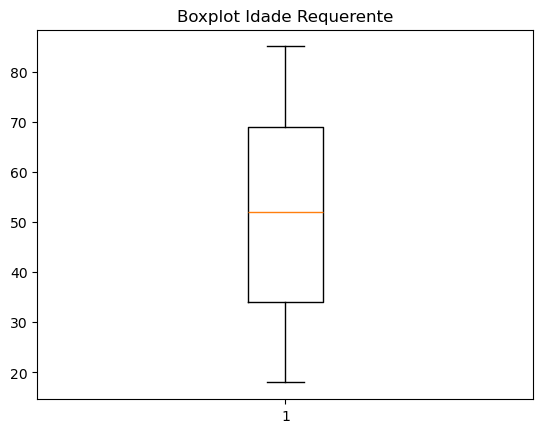

In [63]:
claimant_age_list = df['claimant_age']
fig, ax = plt.subplots()
ax.boxplot(claimant_age_list)
plt.title('Boxplot Idade Requerente')
plt.show()

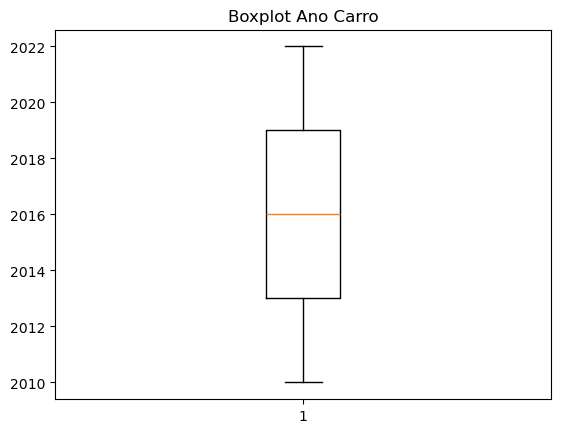

In [64]:
car_year_list = df['car_year']
fig, ax = plt.subplots()
ax.boxplot(car_year_list)
plt.title('Boxplot Ano Carro')
plt.show()

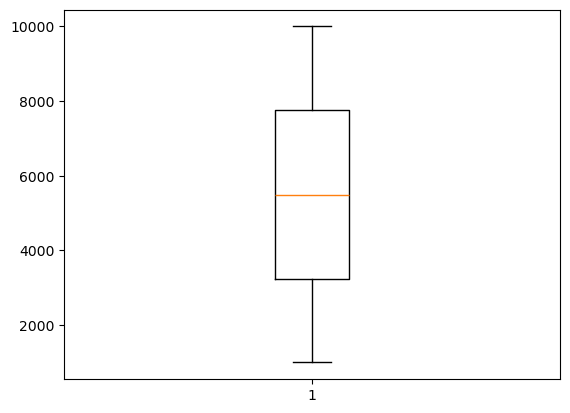

In [65]:
claim_ammount_list = df['claim_amount']
fig, ax = plt.subplots()
ax.boxplot(claim_ammount_list)
plt.show()

In [66]:
# contagem_idades = df['claimant_age'].value_counts()
# contagem_idades.sort_index(inplace=True)

# plt.figure(figsize=(25,6))

# plt.bar(contagem_idades.index, contagem_idades.values)

# plt.xticks(contagem_idades.index)

# plt.xlabel('idade')
# plt.ylabel('quantidade')
# plt.title('Volumetria idades')

# plt.show()

In [67]:

# contagem_ano_carro = df['car_year'].value_counts()
# contagem_ano_carro.sort_index(inplace=True)

# plt.figure(figsize=(25,6))

# plt.bar(contagem_ano_carro.index, contagem_ano_carro.values)

# plt.xticks(contagem_ano_carro.index)

# plt.xlabel('ano')
# plt.ylabel('quantidade')
# plt.title('Volumetria Ano Carro')

# plt.show()

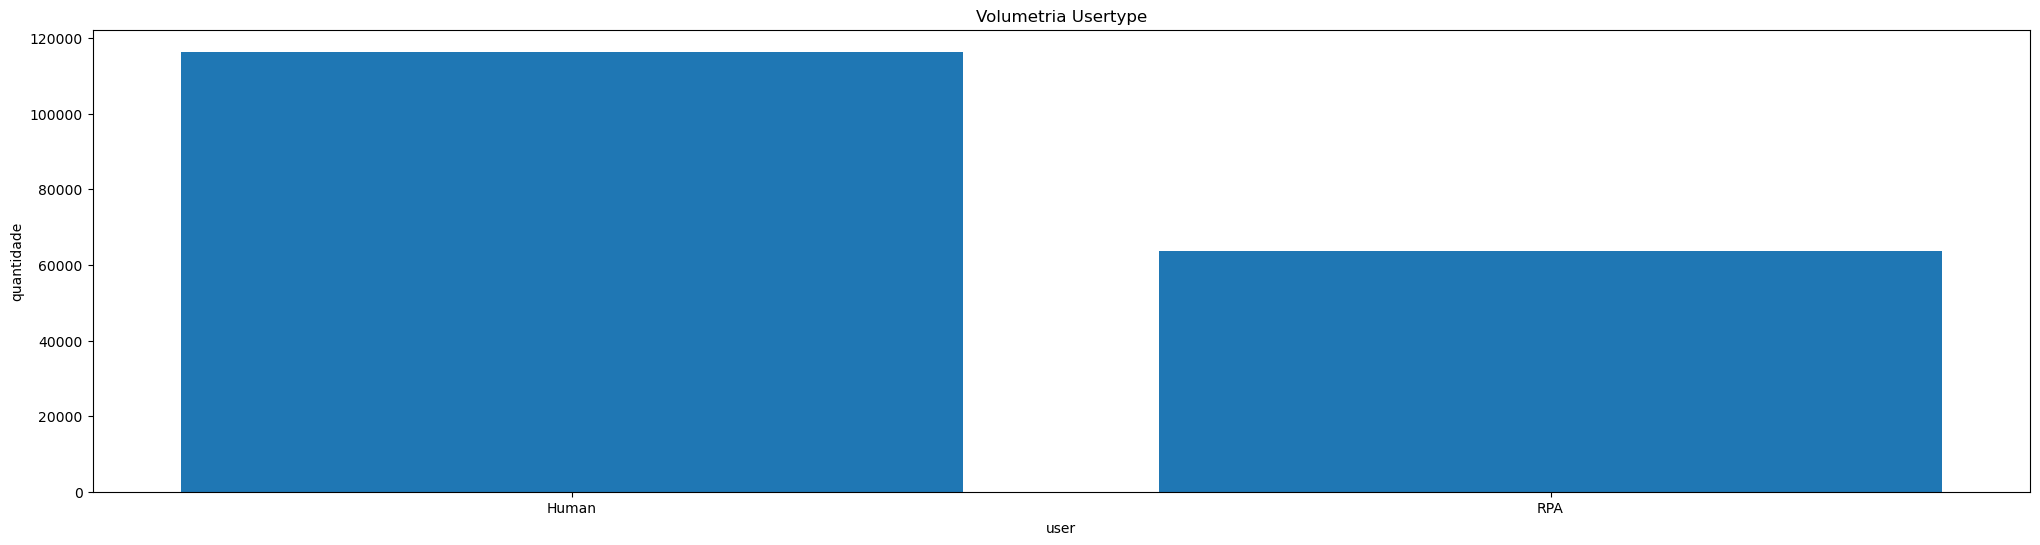

In [68]:
contagem_user_type = df['user_type'].value_counts()
contagem_user_type.sort_index(inplace=True)

plt.figure(figsize=(25,6))

plt.bar(contagem_user_type.index, contagem_user_type.values)

plt.xticks(contagem_user_type.index)

plt.xlabel('user')
plt.ylabel('quantidade')
plt.title('Volumetria Usertype')

plt.show()

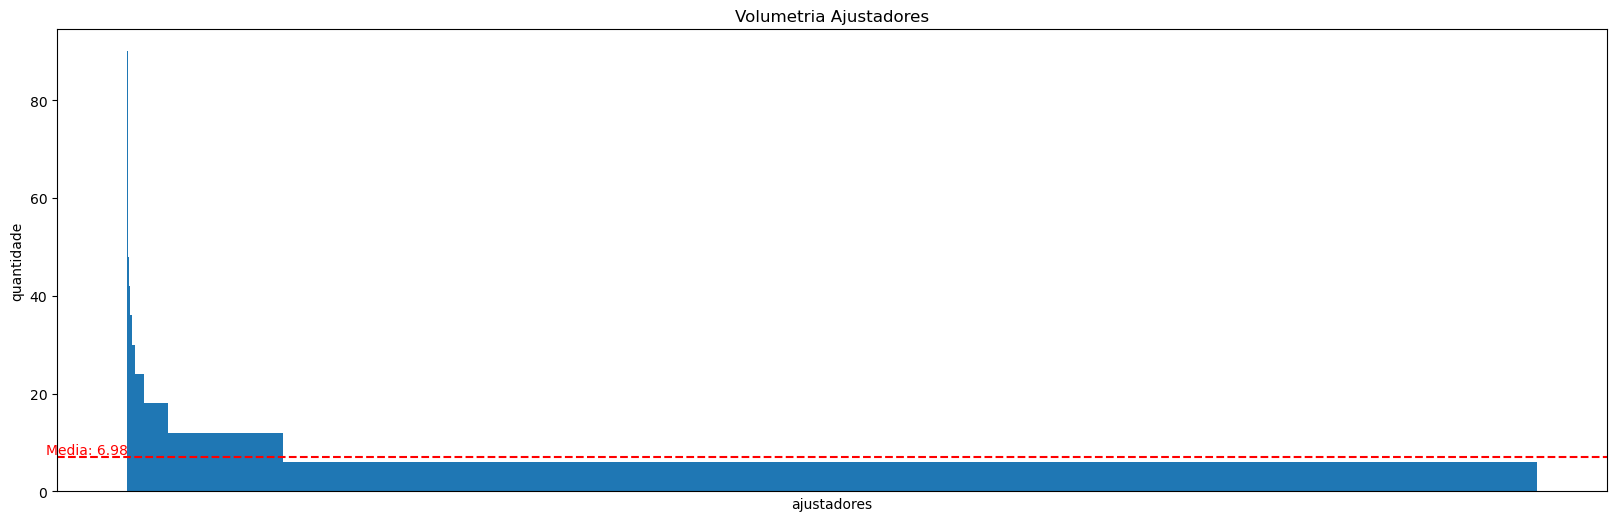

In [69]:
cont_adjuster_name = df['adjuster_name'].value_counts()
cont_adjuster_name.sort_values(inplace=True, ascending=False)

plt.figure(figsize=(20,6))

plt.bar(cont_adjuster_name.index, cont_adjuster_name.values, width=1.0)

mean_adjuster_name = np.mean(cont_adjuster_name.values)
mean_adjuster_name = round(mean_adjuster_name, 2)

plt.axhline(y=mean_adjuster_name, color='r', linestyle = '--')

plt.text(0, mean_adjuster_name, f'Media: {mean_adjuster_name}', color='r', va='bottom', ha= 'right')

plt.xticks([])

plt.xlabel('ajustadores')
plt.ylabel('quantidade')
plt.title('Volumetria Ajustadores')

plt.show()